**Importing Python Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [82]:
import numpy as np
import pandas as pd



In [83]:
vacationdf=pd.read_csv('/content/VacationTrip.csv')
print(vacationdf )

   Distance(KM)  Days  People  Total Expence With Food
0            86     1       2                     7800
1           195     2       5                    14000
2           240     2       5                    13500
3           242     1       4                     8200
4           350     2       3                    11800
5           370     2       4                    17200
6           440     2       2                     9200
7           506     2       2                    13600
8           808     4       6                    45000
9           932     3       4                    42000


**ML Process**

In [84]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

 **Taking X and Y**

In [85]:
X=vacationdf.drop([  'Total Expence With Food'],axis=1)

X


,Distance(KM),Days,People
0,86,1,2
1,195,2,5
2,240,2,5
3,242,1,4
4,350,2,3
5,370,2,4
6,440,2,2
7,506,2,2
8,808,4,6
9,932,3,4


In [86]:
y=vacationdf['Total Expence With Food']
y

0     7800
1    14000
2    13500
3     8200
4    11800
5    17200
6     9200
7    13600
8    45000
9    42000
Name: Total Expence With Food, dtype: int64

In [105]:
x=vacationdf.drop([  'Days','People','Total Expence With Food'],axis=1)

x

,Distance(KM)
0,86
1,195
2,240
3,242
4,350
5,370
6,440
7,506
8,808
9,932


Text(0.5, 1.0, 'House Price at Kovaipudhur')

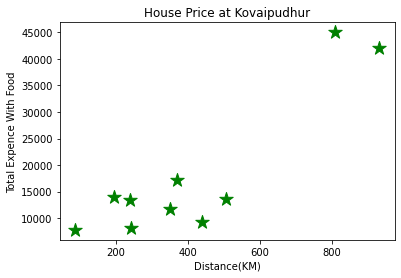

In [108]:
plt.scatter(x,y,marker='*',s=200,color='green')
plt.xlabel('Distance(KM)')
plt.ylabel('Total Expence With Food')
plt.title('Vacation Trip Plan')

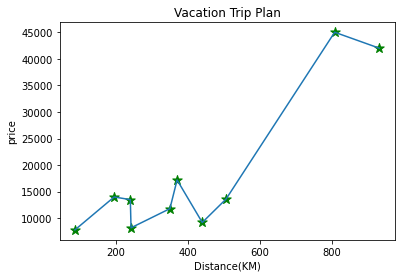

In [110]:
plt.scatter(x,y,marker='*',s=100,color='green')
plt.xlabel('Distance(KM)')
plt.ylabel('price')
plt.title('Vacation Trip Plan')
plt.plot(x,y)

**Prediction**

In [87]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [88]:
reg.predict([[932,3,4]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([38953.15426358])

In [89]:
reg.score(X,y)

0.9241196090458283

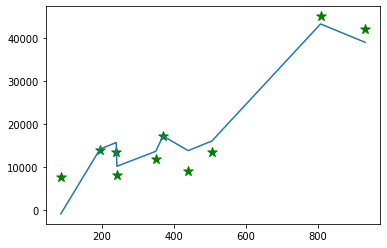

In [112]:

prediction=reg.predict(X)
prediction
plt.scatter(x,y,marker='*',s=100,color='green')
plt.plot(x,prediction)

In [97]:
clientdf=pd.read_csv('/content/Client.csv')
clientdf

,Distance(KM),Days,No.Of.people
0,364,2,2
1,190,2,4
2,1232,4,4
3,160,2,6
4,172,2,2
5,444,3,2
6,312,3,2
7,188,2,4
8,116,1,2


In [98]:
resultdf=reg.predict(clientdf)
resultdf


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- No.Of.people
Feature names seen at fit time, yet now missing:
- People

  warnings.warn(message, FutureWarning)


array([11268.96169994, 11145.41641202, 51799.65293457, 15896.12099288,
        4769.9618749 , 16668.68973807, 12200.62735836, 11077.71849718,
         182.60881489])

In [99]:
clientdf

,Distance(KM),Days,No.Of.people
0,364,2,2
1,190,2,4
2,1232,4,4
3,160,2,6
4,172,2,2
5,444,3,2
6,312,3,2
7,188,2,4
8,116,1,2


In [100]:
clientdf['Total Expence With Food']=resultdf
clientdf

,Distance(KM),Days,No.Of.people,Total Expence With Food
0,364,2,2,11268.961700
1,190,2,4,11145.416412
2,1232,4,4,51799.652935
3,160,2,6,15896.120993
4,172,2,2,4769.961875
5,444,3,2,16668.689738
6,312,3,2,12200.627358
7,188,2,4,11077.718497
8,116,1,2,182.608815


In [101]:
clientdf.to_csv('clientoutputfile.csv',index=False)

**BEST VACATION TRIP ANALYSIS**

In [126]:
print("Best Prediction based on Budget" )
a=resultdf
print(a.min())

Best Prediction based on Budget
182.6088148941053


**Creating a pickel**

In [102]:
import pickle

In [103]:
with open('vacationtrip','wb') as f:
    pickle.dump(reg,f)